In [ ]:
!pip install autokeras

     |████████████████████████████████| 166 kB 5.0 MB/s 
     |████████████████████████████████| 97 kB 6.0 MB/s 
     |████████████████████████████████| 454.3 MB 16 kB/s 
     |████████████████████████████████| 462 kB 56.4 MB/s 
     |████████████████████████████████| 4.0 MB 41.2 MB/s 
     |████████████████████████████████| 1.2 MB 55.2 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.41.0
    Uninstalling grpcio-1.41.0:
      Successfully uninstalled grpcio-1.41.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils.data_utils import Sequence
import autokeras as ak

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4]


In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# Initialize the image classifier.
clf = ak.ImageClassifier(
    overwrite=True,
    max_trials=1)
# Feed the image classifier with training data.
history = clf.fit(x_train, y_train)

Trial 1 Complete [01h 32m 57s]
val_loss: 0.038215041160583496

Best val_loss So Far: 0.038215041160583496
Total elapsed time: 01h 32m 57s
INFO:tensorflow:Oracle triggered exit
Epoch 1/22
1875/1875 [==============================] - 199s 106ms/step - loss: 0.1588 - accuracy: 0.9512
Epoch 2/22
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0721 - accuracy: 0.9772
Epoch 3/22
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0584 - accuracy: 0.9816
Epoch 4/22
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0512 - accuracy: 0.9837
Epoch 5/22
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0441 - accuracy: 0.9865
Epoch 6/22
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0413 - accuracy: 0.9866
Epoch 7/22
1875/1875 [==============================] - 183s 98ms/step - loss: 0.0375 - accuracy: 0.9880
Epoch 8/22
1875/1875 [==============================] - 184s 98ms/step - loss: 0.03

In [ ]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 28, 28)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 28, 28, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 28, 28, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0     

In [ ]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

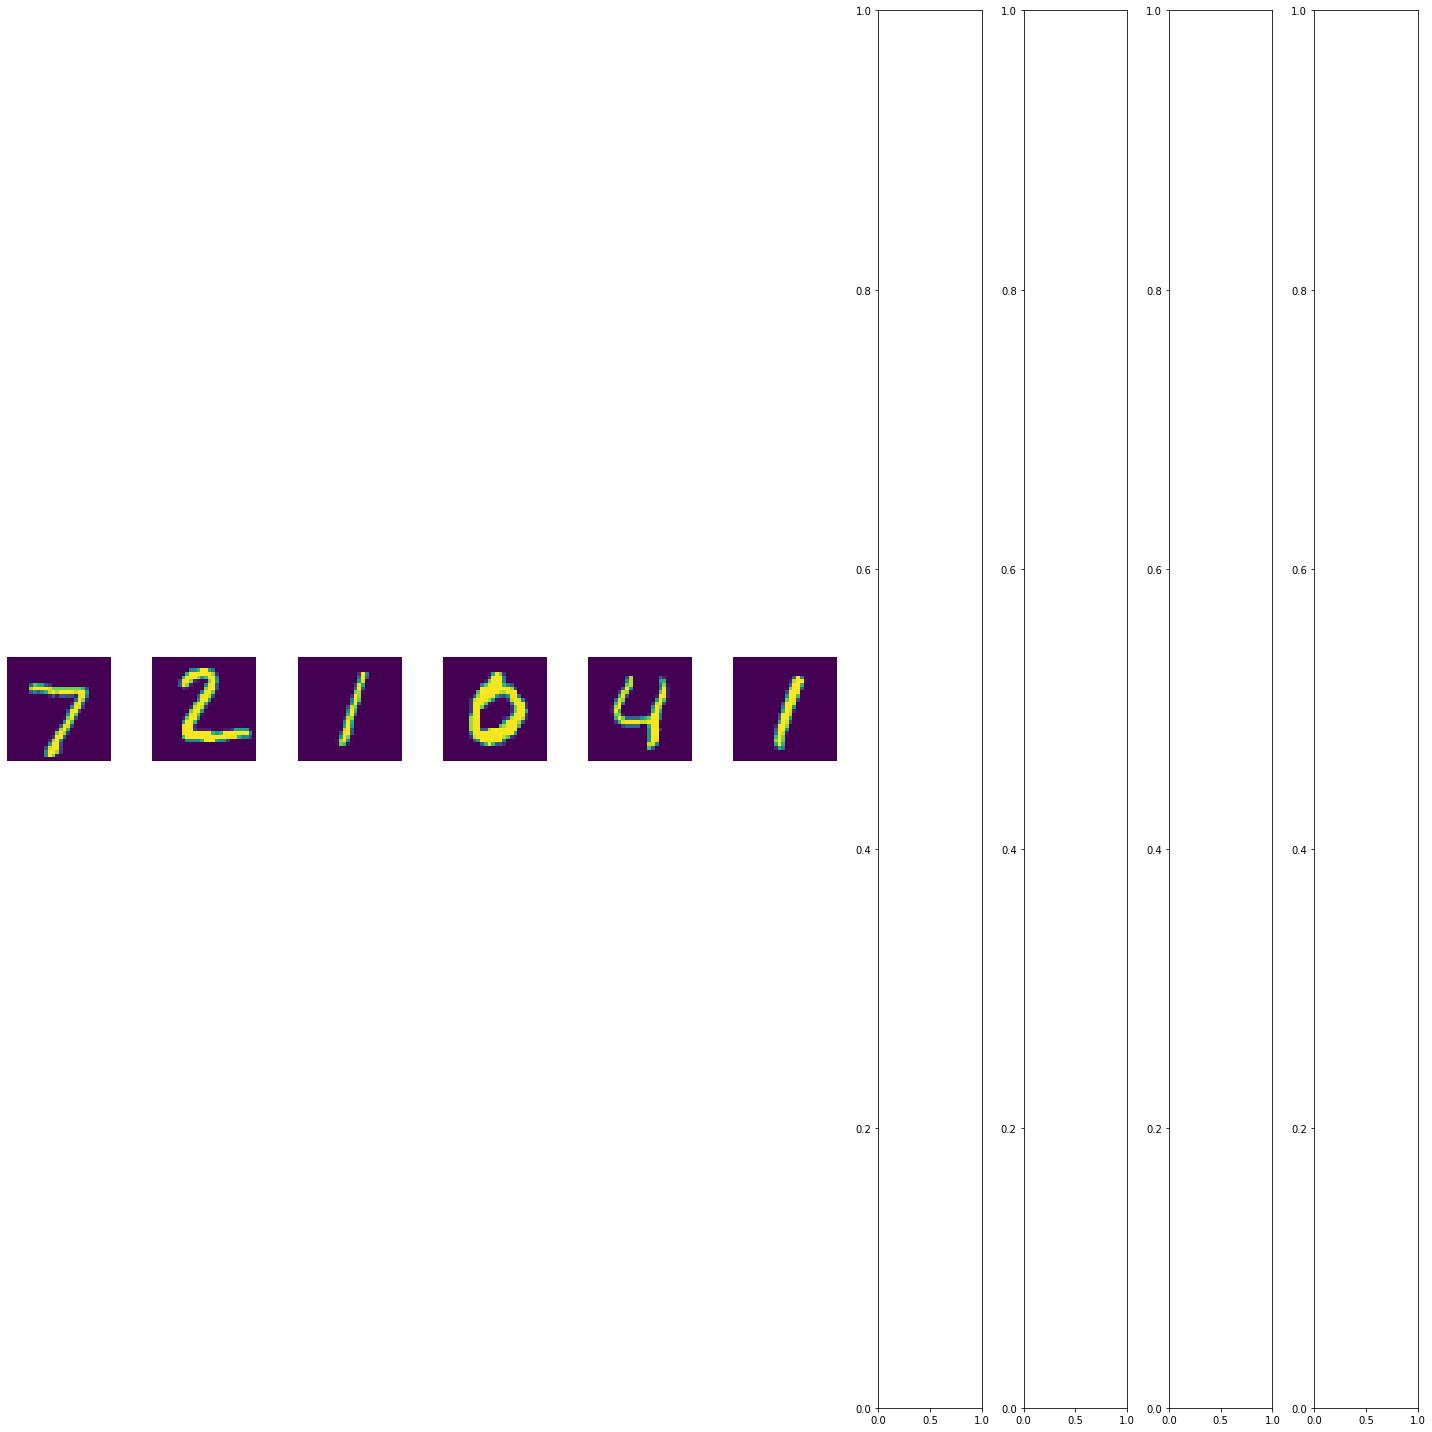

In [ ]:
plotImages(x_test[:6])

In [ ]:
# Predict with the best model.
predicted_y = clf.predict(x_test[:6])
print(predicted_y)

1/1 [==============================] - 0s 25ms/step
[['7']
 ['2']
 ['1']
 ['0']
 ['4']
 ['1']]


In [ ]:
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))